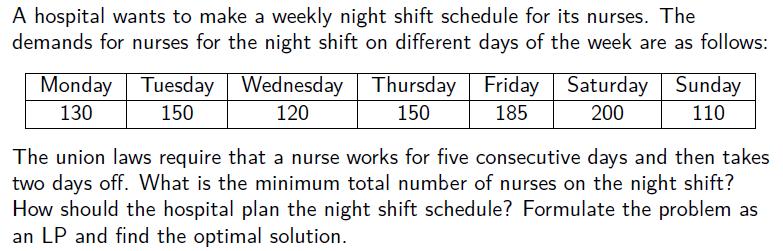

In [1]:
pip install pulp

     |████████████████████████████████| 40.6MB 94kB/s 


In [2]:
import pulp as plp
from pulp import *
import numpy as np
import pandas as pd

In [3]:
prob = LpProblem(name = "Staffing Problem")
prob.sense = LpMinimize

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
A = LpVariable(name = "Monday Staff", cat = LpInteger, lowBound= 0) 
B = LpVariable(name = "Tuesday Staff", cat = LpInteger, lowBound= 0)
C = LpVariable(name = "Wednesday Staff", cat = LpInteger, lowBound= 0) 
D = LpVariable(name = "Thursday Staff", cat = LpInteger, lowBound= 0)
E = LpVariable(name = "Friday Staff", cat = LpInteger, lowBound= 0) 
F = LpVariable(name = "Saturday Staff", cat = LpInteger, lowBound= 0) 
G = LpVariable(name = "Sunday Staff", cat = LpInteger, lowBound= 0) 

In [ ]:
Constraint_1 = A+D+E+F+G >= 130
Constraint_2 = A+B+E+F+G >= 150
Constraint_3 = A+B+C+F+G >= 120
Constraint_4 = A+B+C+D+G >= 150
Constraint_5 = A+B+C+D+E >= 185
Constraint_6 = B+C+D+E+F >= 200
Constraint_7 = C+D+E+F+G >= 110

In [ ]:
Obj = A+B+C+D+E+F+G

In [ ]:
prob += Obj
prob += Constraint_1
prob += Constraint_2
prob += Constraint_3
prob += Constraint_4
prob += Constraint_5
prob += Constraint_6
prob += Constraint_7

In [ ]:
print(prob)

Staffing_Problem:
MINIMIZE
1*Friday_Staff + 1*Monday_Staff + 1*Saturday_Staff + 1*Sunday_Staff + 1*Thursday_Staff + 1*Tuesday_Staff + 1*Wednesday_Staff + 0
SUBJECT TO
_C1: Friday_Staff + Monday_Staff + Saturday_Staff + Sunday_Staff
 + Thursday_Staff >= 130

_C2: Friday_Staff + Monday_Staff + Saturday_Staff + Sunday_Staff
 + Tuesday_Staff >= 150

_C3: Monday_Staff + Saturday_Staff + Sunday_Staff + Tuesday_Staff
 + Wednesday_Staff >= 120

_C4: Monday_Staff + Sunday_Staff + Thursday_Staff + Tuesday_Staff
 + Wednesday_Staff >= 150

_C5: Friday_Staff + Monday_Staff + Thursday_Staff + Tuesday_Staff
 + Wednesday_Staff >= 185

_C6: Friday_Staff + Saturday_Staff + Thursday_Staff + Tuesday_Staff
 + Wednesday_Staff >= 200

_C7: Friday_Staff + Saturday_Staff + Sunday_Staff + Thursday_Staff
 + Wednesday_Staff >= 110

VARIABLES
0 <= Friday_Staff Integer
0 <= Monday_Staff Integer
0 <= Saturday_Staff Integer
0 <= Sunday_Staff Integer
0 <= Thursday_Staff Integer
0 <= Tuesday_Staff Integer
0 <= Wednesda

In [ ]:
prob.solve()

1

In [ ]:
value(prob.objective)

212.0

In [ ]:
print("Objective Function Value = ", value(prob.objective) )
print("\n")
print("Optimal Solution:")
for v in prob.variables():
    print("\t")
    print(v.name, "=", v.varValue)
print("\n")
print("Constraints")
for c in list(prob.constraints.values()):
    print("\t")
    print(c.name, "=", c.value())


Objective Function Value =  212.0


Optimal Solution:
	
Friday_Staff = 29.0
	
Monday_Staff = 12.0
	
Saturday_Staff = 27.0
	
Sunday_Staff = 0.0
	
Thursday_Staff = 62.0
	
Tuesday_Staff = 82.0
	
Wednesday_Staff = 0.0


Constraints
	
None = 0.0
	
None = 0.0
	
None = 1.0
	
None = 6.0
	
None = 0.0
	
None = 0.0
	
None = 8.0


# Staff Scheduling using Excel Solver

---
The solution is different as the variable were taken continuous while computing the solution.


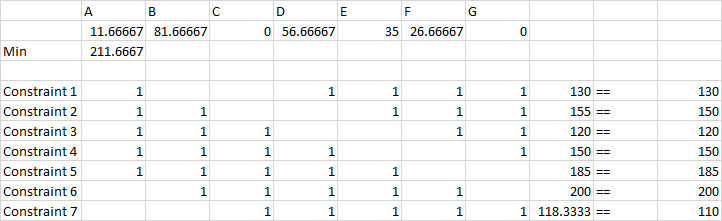


# Staff Scheduling Using Alternate Method

In [ ]:
lp_prob = LpProblem(name = "Staff Scheduling")

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1195: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
lp_prob.sense = LpMinimize

In [ ]:
Appointment = ["Mon", "Tues", "Wed", "Thurs", "Fri","Sat", "Sun"]
RHS = [130,150,120,150,185,200,110]
obj_coeff = [1,1,1,1,1,1,1]
coef_matrix = np.array([
                        [1,0,0,1,1,1,1],
                        [1,1,0,0,1,1,1],
                        [1,1,1,0,0,1,1],
                        [1,1,1,1,0,0,1],
                        [1,1,1,1,1,0,0],
                        [0,1,1,1,1,1,0],
                        [0,0,1,1,1,1,1]
])

In [ ]:
Variable_ = {i: LpVariable(name = Appointment[i], lowBound=0,upBound=RHS[i], cat = LpInteger) for i in range(len(Appointment))}

In [ ]:
Variable_

{0: Mon, 1: Tues, 2: Wed, 3: Thurs, 4: Fri, 5: Sat, 6: Sun}

In [ ]:
Constraint = {i: lp_prob.addConstraint(LpConstraint(name = "Constraint_{}".format(i), sense = 1, rhs = RHS[i], e = lpSum(coef_matrix[i,j]*Variable_[j] for j in range(len(Appointment))))) for i in range(len(RHS))}

In [ ]:
obj = lpSum(Variable_[i]*obj_coeff[i] for i in range(len(Appointment)))

In [ ]:
lp_prob.setObjective(obj)

In [ ]:
lp_prob

Staff_Scheduling:
MINIMIZE
1*Fri + 1*Mon + 1*Sat + 1*Sun + 1*Thurs + 1*Tues + 1*Wed + 0
SUBJECT TO
Constraint_0: Fri + Mon + Sat + Sun + Thurs >= 130

Constraint_1: Fri + Mon + Sat + Sun + Tues >= 150

Constraint_2: Mon + Sat + Sun + Tues + Wed >= 120

Constraint_3: Mon + Sun + Thurs + Tues + Wed >= 150

Constraint_4: Fri + Mon + Thurs + Tues + Wed >= 185

Constraint_5: Fri + Sat + Thurs + Tues + Wed >= 200

Constraint_6: Fri + Sat + Sun + Thurs + Wed >= 110

VARIABLES
0 <= Fri <= 185 Integer
0 <= Mon <= 130 Integer
0 <= Sat <= 200 Integer
0 <= Sun <= 110 Integer
0 <= Thurs <= 150 Integer
0 <= Tues <= 150 Integer
0 <= Wed <= 120 Integer

In [ ]:
lp_prob.solve()

1

In [ ]:
print("Objective Function Value = ", value(lp_prob.objective) )
print("\n")
print("Optimal Solution:")
for v in lp_prob.variables():
    print("\t")
    print(v.name, "=", v.varValue)
print("\n")
print("Constraints")
for c in list(lp_prob.constraints.values()):
    print("\t")
    print(c.name, "=", c.value())


Objective Function Value =  212.0


Optimal Solution:
	
Fri = 29.0
	
Mon = 12.0
	
Sat = 27.0
	
Sun = 0.0
	
Thurs = 62.0
	
Tues = 82.0
	
Wed = 0.0


Constraints
	
Constraint_0 = 0.0
	
Constraint_1 = 0.0
	
Constraint_2 = 1.0
	
Constraint_3 = 6.0
	
Constraint_4 = 0.0
	
Constraint_5 = 0.0
	
Constraint_6 = 8.0
